In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
#Importing the 311 NYC service request data 
dfMaster=pd.read_csv(r'F:\data sciene course\simplilearn\Data Science and Python\data Science with python assessment\problem 1\311_Service_Requests_from_2010_to_Present.CSV')
dfMaster     

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [4]:
dfMaster.isnull().shape

(300698, 53)

In [5]:
dfMaster.isnull().sum()/(dfMaster.isnull().shape[0])*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [6]:
#Converting the colums to list
dfMaster.columns.to_list()

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',


In [7]:
#Converting the list comlums to data frame
pd.DataFrame(dfMaster.columns.to_list()).rename(columns={0:"Columns"})

,Columns
0,Unique Key
1,Created Date
2,Closed Date
3,Agency
4,Agency Name
5,Complaint Type
6,Descriptor
7,Location Type
8,Incident Zip
9,Incident Address


In [8]:
#Removing the default index and making the renamed "columns" as index
rel_cols = pd.DataFrame(dfMaster.columns.to_list()).rename(columns={0:"Columns"}).set_index("Columns")
#Filtering out the columns having NAN value with more than 80%
rel_cols = rel_cols[dfMaster.isna().sum()/dfMaster.shape[0] *100 < 80].reset_index()
rel_cols
#These are the columns having "NaN" less than 80%

,Columns
0,Unique Key
1,Created Date
2,Closed Date
3,Agency
4,Agency Name
5,Complaint Type
6,Descriptor
7,Location Type
8,Incident Zip
9,Incident Address


In [9]:
rel_cols["Columns"].to_list()

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Address Type',
 'City',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'Latitude',
 'Longitude',
 'Location']

In [10]:
dfMaster = dfMaster[rel_cols["Columns"]]
dfMaster

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [11]:
#Adding back the filtered columns to orginal dataframe
#dfMaster = dfMaster[rel_cols["Columns"].to_list()]
#dfMaster

In [12]:
dfMaster.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [13]:
dfMasterDrop=dfMaster
dfMasterDrop.drop(columns=['School Code','School Phone Number','School Address','School City','School State','School Not Found',"School Name",'School Number','School Region','School Zip','Park Facility Name'],axis=1,inplace=True)


In [14]:
dfMasterDrop

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Your complaint has been forwarded to the New Y...,NaN,0 Unspecified,Unspecified,NaN,NaN,Unspecified,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,The Police Department responded and upon arriv...,03/29/2015 02:33:59 AM,09 QUEENS,QUEENS,1026931.0,192185.0,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,The Police Department responded to the complai...,03/29/2015 03:40:20 AM,03 BROOKLYN,BROOKLYN,999713.0,194161.0,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,The Police Department responded to the complai...,03/29/2015 04:38:35 AM,10 BRONX,BRONX,1030021.0,244520.0,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [15]:
dfMasterDrop.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of         Unique Key  Created Date  Closed Date  Agency  Agency Name  \
0            False         False        False   False        False   
1            False         False        False   False        False   
2            False         False        False   False        False   
3            False         False        False   False        False   
4            False         False        False   False        False   
...            ...           ...          ...     ...          ...   
300693       False         False         True   False        False   
300694       False         False        False   False        False   
300695       False         False        False   False        False   
300696       False         False        False   False        False   
300697       False         False        False   False        False   

        Complaint Type  Descriptor  Location Type  Incident Zip  \
0                False       F

In [16]:
#sns.heatmap(dfMasterDrop.isnull(),yticklabels=False, annot=True)

In [17]:
dfMasterDrop.isnull()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,False,False,True,False,False,False,False,False,True,False,...,False,True,False,False,True,True,False,True,True,True
300694,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
dfMasterDrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [19]:
dfMasterDrop.interpolate()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10710.0,CRESCENT AVENUE,...,Your complaint has been forwarded to the New Y...,NaN,0 Unspecified,Unspecified,1006785.5,196169.5,Unspecified,40.705065,-73.918733,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,The Police Department responded and upon arriv...,03/29/2015 02:33:59 AM,09 QUEENS,QUEENS,1026931.0,192185.0,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,The Police Department responded to the complai...,03/29/2015 03:40:20 AM,03 BROOKLYN,BROOKLYN,999713.0,194161.0,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,The Police Department responded to the complai...,03/29/2015 04:38:35 AM,10 BRONX,BRONX,1030021.0,244520.0,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [20]:
dfMasterDrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [21]:
dfMasterDrop.Descriptor.isnull().count()

300698

In [22]:
dfMasterDrop.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2164
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Cross Street 1                    49279
Cross Street 2                    49779
Address Type                       2815
City                               2614
Facility Type                      2171
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                               0
X Coordinate (State Plane)         3540
Y Coordinate (State Plane)         3540
Park Borough                          0


In [23]:
dfMasterDrop['created_date'] = pd.to_datetime(dfMasterDrop['Created Date'])
dfMasterDrop['closed_date'] = pd.to_datetime(dfMasterDrop['Closed Date'])
dfMasterDrop['due_date'] = pd.to_datetime(dfMasterDrop['Due Date'])
dfMasterDrop

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-03-29 00:33:41,NaT,2015-03-29 08:33:41
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,QUEENS,1026931.0,192185.0,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",2015-03-29 00:33:28,2015-03-29 02:33:59,2015-03-29 08:33:28
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,BROOKLYN,999713.0,194161.0,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",2015-03-29 00:33:03,2015-03-29 03:40:20,2015-03-29 08:33:03
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,BRONX,1030021.0,244520.0,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",2015-03-29 00:33:02,2015-03-29 04:38:35,2015-03-29 08:33:02


In [24]:
dfMasterTimedrop=dfMasterDrop.drop(columns=["Created Date","Closed Date","Due Date"])
dfMasterTimedrop

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date
0,32310363,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00
1,32309934,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00
2,32309159,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00
3,32305098,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00
4,32306529,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,EAST 186,...,Unspecified,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-03-29 00:33:41,NaT,2015-03-29 08:33:41
300694,30281230,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,DEAD END,...,QUEENS,1026931.0,192185.0,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",2015-03-29 00:33:28,2015-03-29 02:33:59,2015-03-29 08:33:28
300695,30283424,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,HOPKINS STREET,...,BROOKLYN,999713.0,194161.0,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",2015-03-29 00:33:03,2015-03-29 03:40:20,2015-03-29 08:33:03
300696,30280004,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,CODDINGTON AVENUE,...,BRONX,1030021.0,244520.0,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",2015-03-29 00:33:02,2015-03-29 04:38:35,2015-03-29 08:33:02


In [25]:
dfMasterTimedrop["Longitude"].isnull().values.any()

True

In [26]:
#Creating Request_Closing_Time by deducting Createds_Date from due_date and coverting the difference to second
dfMasterTimedrop["Request_Closing_Time"]=(dfMasterTimedrop[("closed_date")]-dfMasterTimedrop[("created_date")]).dt.total_seconds()
dfMasterTimedrop


,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
0,32310363,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,3315.0
1,32309934,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,5176.0
2,32309159,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00,17491.0
3,32305098,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00,27914.0
4,32306529,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00,12422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,EAST 186,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-03-29 00:33:41,NaT,2015-03-29 08:33:41,NaN
300694,30281230,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,DEAD END,...,1026931.0,192185.0,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",2015-03-29 00:33:28,2015-03-29 02:33:59,2015-03-29 08:33:28,7231.0
300695,30283424,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,HOPKINS STREET,...,999713.0,194161.0,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",2015-03-29 00:33:03,2015-03-29 03:40:20,2015-03-29 08:33:03,11237.0
300696,30280004,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,CODDINGTON AVENUE,...,1030021.0,244520.0,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",2015-03-29 00:33:02,2015-03-29 04:38:35,2015-03-29 08:33:02,14733.0


In [27]:
#Request_Closing_Time contains NaN, so to remove it inplace of Closing_date we considered closed_date to fill the values of Request_Closing_Time
dfMasterTimedropNaNRemoved=dfMasterTimedrop
dfMasterTimedropNaNRemoved.loc[dfMasterTimedropNaNRemoved['Request_Closing_Time'].isnull(), "Request_Closing_Time"]=(dfMasterTimedrop[("due_date")]-dfMasterTimedrop[("created_date")]).dt.total_seconds()
dfMasterTimedropNaNRemoved

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
0,32310363,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,3315.0
1,32309934,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,5176.0
2,32309159,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00,17491.0
3,32305098,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00,27914.0
4,32306529,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00,12422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,EAST 186,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-03-29 00:33:41,NaT,2015-03-29 08:33:41,28800.0
300694,30281230,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,DEAD END,...,1026931.0,192185.0,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",2015-03-29 00:33:28,2015-03-29 02:33:59,2015-03-29 08:33:28,7231.0
300695,30283424,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,HOPKINS STREET,...,999713.0,194161.0,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",2015-03-29 00:33:03,2015-03-29 03:40:20,2015-03-29 08:33:03,11237.0
300696,30280004,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,CODDINGTON AVENUE,...,1030021.0,244520.0,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",2015-03-29 00:33:02,2015-03-29 04:38:35,2015-03-29 08:33:02,14733.0


In [28]:
#To check if "Request_Closing_Time" contains a NaN, Flase means there is no NaN value
dfMasterTimedropNaNRemoved[dfMasterTimedropNaNRemoved["Request_Closing_Time"]==14929]

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time


In [29]:
dfMasterTimedropNaNRemoved.loc[dfMasterTimedropNaNRemoved["Request_Closing_Time"].isnull()]

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
161610,31227876,NYPD,New York City Police Department,Ferry Complaint,Homeless Issue,Terminal,NaN,NaN,NaN,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-08-03 08:28:00,NaT,NaT,NaN
192974,31015799,NYPD,New York City Police Department,Ferry Complaint,Disruptive Passenger,Ferry,NaN,NaN,NaN,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-07-06 09:12:00,NaT,NaT,NaN


In [30]:
dfMasterTimedropNaNRemoved.interpolate()

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
0,32310363,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,3315.0
1,32309934,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,5176.0
2,32309159,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00,17491.0
3,32305098,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00,27914.0
4,32306529,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00,12422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10710.0,CRESCENT AVENUE,CRESCENT AVENUE,EAST 186,...,1006785.5,196169.5,Unspecified,40.705065,-73.918733,NaN,2015-03-29 00:33:41,NaT,2015-03-29 08:33:41,28800.0
300694,30281230,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,DEAD END,...,1026931.0,192185.0,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",2015-03-29 00:33:28,2015-03-29 02:33:59,2015-03-29 08:33:28,7231.0
300695,30283424,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,HOPKINS STREET,...,999713.0,194161.0,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",2015-03-29 00:33:03,2015-03-29 03:40:20,2015-03-29 08:33:03,11237.0
300696,30280004,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,CODDINGTON AVENUE,...,1030021.0,244520.0,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",2015-03-29 00:33:02,2015-03-29 04:38:35,2015-03-29 08:33:02,14733.0


In [31]:
dfMasterTimedropNaNRemoved["Request_Closing_Time"].isnull().values.any()

True

In [32]:
dfMasterTimedropNaNRemoved.loc[dfMasterTimedropNaNRemoved["Request_Closing_Time"].isnull()]

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
161610,31227876,NYPD,New York City Police Department,Ferry Complaint,Homeless Issue,Terminal,NaN,NaN,NaN,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-08-03 08:28:00,NaT,NaT,NaN
192974,31015799,NYPD,New York City Police Department,Ferry Complaint,Disruptive Passenger,Ferry,NaN,NaN,NaN,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-07-06 09:12:00,NaT,NaT,NaN


In [33]:
dfMasterTimedropNaNRemoved["Request_Closing_Time"].fillna(dfMasterTimedropNaNRemoved["Request_Closing_Time"].mean())

0          3315.0
1          5176.0
2         17491.0
3         27914.0
4         12422.0
           ...   
300693    28800.0
300694     7231.0
300695    11237.0
300696    14733.0
300697    14929.0
Name: Request_Closing_Time, Length: 300698, dtype: float64

In [34]:
dfMasterTimedropNaNRemoved.loc[dfMasterTimedropNaNRemoved["Request_Closing_Time"].isnull()]

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
161610,31227876,NYPD,New York City Police Department,Ferry Complaint,Homeless Issue,Terminal,NaN,NaN,NaN,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-08-03 08:28:00,NaT,NaT,NaN
192974,31015799,NYPD,New York City Police Department,Ferry Complaint,Disruptive Passenger,Ferry,NaN,NaN,NaN,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-07-06 09:12:00,NaT,NaT,NaN


In [35]:
#Row No 161610, and 192974 contains almost all the columns are either Unspecified or NaN, hence droping these two columns
dfMasterTimedropNaNRemoved.drop([161610,192974],axis=0, inplace=True)

In [36]:
#We dont have any NaN value in the column "Request_Closing_Time"
dfMasterTimedropNaNRemoved.loc[dfMasterTimedropNaNRemoved["Request_Closing_Time"].isnull()]

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time


In [37]:
dfMasterTimedropNaNRemoved.loc[(dfMasterTimedropNaNRemoved["Incident Zip"].isnull())&(dfMasterTimedropNaNRemoved["Incident Address"]!="NaN")]

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
33,32306700,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,12TH STREET,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-12-31 23:18:10,2016-01-02 01:04:00,2016-01-01 07:18:00,92750.0
283,32309451,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,72-23-72-2 72ND PLACE,72ND PLACE,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-12-31 17:40:16,2016-01-01 10:59:00,2016-01-01 01:40:00,62324.0
302,32309860,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,NaN,9-15-9-99 CORNAGA AVENUE,CORNAGA AVENUE,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-12-31 17:05:30,2016-01-01 08:17:00,2016-01-01 01:05:00,54690.0
416,32305700,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,90TH ST,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-12-31 14:16:04,NaT,2015-12-31 22:16:04,28800.0
611,32309308,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,30 STREET,30 AVENUE,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-12-31 09:58:06,NaT,2015-12-31 17:58:06,28800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,23RD AVE,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-03-29 14:40:19,NaT,2015-03-29 22:40:19,28800.0
300492,30284963,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,COOPER AVE,80TH STREET,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-03-29 08:50:15,NaT,2015-03-29 16:50:15,28800.0
300496,30285492,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,80 STREET,COOPER AVENUE,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-03-29 08:44:13,NaT,2015-03-29 16:44:13,28800.0
300620,30282717,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,E 186,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-03-29 01:55:35,NaT,2015-03-29 09:55:35,28800.0


In [38]:
dfMasterTimedropNaNRemoved[dfMasterTimedropNaNRemoved["Cross Street 2"].isnull()]

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
33,32306700,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,12TH STREET,NaN,...,NaN,NaN,Unspecified,NaN,NaN,NaN,2015-12-31 23:18:10,2016-01-02 01:04:00,2016-01-01 07:18:00,92750.0
37,32307213,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11375.0,NaN,NaN,NaN,...,1026953.0,207604.0,QUEENS,40.736399,-73.845909,"(40.73639857849262, -73.84590947131231)",2015-12-31 23:12:45,2016-01-01 05:37:00,2016-01-01 07:12:00,23055.0
38,32308014,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11211.0,NaN,NaN,NaN,...,1000408.0,199414.0,BROOKLYN,40.714007,-73.941715,"(40.714007352909874, -73.94171469793936)",2015-12-31 23:11:33,2015-12-31 23:41:01,2016-01-01 07:11:00,1768.0
83,32305846,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11209.0,COLONIAL ROAD,COLONIAL ROAD,NaN,...,975195.0,170298.0,BROOKLYN,40.634101,-74.032624,"(40.63410061166329, -74.03262417565837)",2015-12-31 22:40:46,2015-12-31 22:55:33,2016-01-01 06:40:00,887.0
85,32305085,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11379.0,NaN,NaN,NaN,...,1013098.0,198524.0,QUEENS,40.711532,-73.895943,"(40.71153224007471, -73.89594304802966)",2015-12-31 22:40:01,2015-12-31 23:21:46,2016-01-01 06:40:00,2505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300666,30283226,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10304.0,NaN,NaN,NaN,...,962120.0,168430.0,STATEN ISLAND,40.628950,-74.079726,"(40.62895033304775, -74.07972582833492)",2015-03-29 01:04:59,2015-03-29 05:17:15,2015-03-29 09:04:59,15136.0
300667,30279563,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10014.0,NaN,NaN,NaN,...,983057.0,205398.0,MANHATTAN,40.730447,-74.004304,"(40.7304466607431, -74.0043044630722)",2015-03-29 01:04:01,2015-03-29 01:23:04,2015-03-29 09:04:01,1143.0
300669,30283741,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,...,997984.0,238556.0,MANHATTAN,40.821446,-73.950379,"(40.82144605015569, -73.95037859121894)",2015-03-29 01:02:05,2015-03-29 05:26:38,2015-03-29 09:02:05,15873.0
300690,30280538,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10466.0,NaN,NaN,NaN,...,1028258.0,267359.0,BRONX,40.900403,-73.840809,"(40.90040252667784, -73.84080863767632)",2015-03-29 00:35:23,2015-03-29 08:41:24,2015-03-29 08:35:23,29161.0


In [39]:
#pd.set_option("display.max_rows",247) 
dfMasterTimedropNaNRemoved[["Request_Closing_Time","City","Incident Zip",]].groupby(by=["City","Incident Zip"]).mean()

Request_Closing_Time
City       Incident Zip                      
ARVERNE    11692.0                8153.736364
ASTORIA    11102.0               17683.601128
           11103.0               15058.799799
           11105.0               16949.558211
           11106.0               17096.632099
...                                       ...
WHITESTONE 11357.0               11683.501367
WOODHAVEN  11421.0               20147.235390
WOODSIDE   11372.0                1260.000000
           11377.0               24823.010443
Woodside   11377.0               18725.000000

[241 rows x 1 columns]

In [40]:
pd.options.display.float_format = '{:.2f}'.format
dfGrpComplainTypeVsRequesttime=dfMasterTimedropNaNRemoved[["Request_Closing_Time","Complaint Type",]].groupby(by=["Complaint Type"]).mean()
dfGrpComplainTypeVsRequesttime

,Request_Closing_Time
Complaint Type,
Agency Issues,18937.17
Animal Abuse,18780.58
Animal in a Park,1212605.00
Bike/Roller/Skate Chronic,13666.34
Blocked Driveway,17102.89
Derelict Vehicle,26527.70
Disorderly Youth,12810.90
Drinking,13960.79
Graffiti,25744.50


In [41]:
dfGrpComplainTypeVsRequesttimeRenamed=dfGrpComplainTypeVsRequesttime.reset_index()
dfGrpComplainTypeVsRequesttimeRenamed.rename(columns={"Complaint Type":"Complaint_Type"},inplace=True)
dfGrpComplainTypeVsRequesttimeRenamed

,Complaint_Type,Request_Closing_Time
0,Agency Issues,18937.17
1,Animal Abuse,18780.58
2,Animal in a Park,1212605.00
3,Bike/Roller/Skate Chronic,13666.34
4,Blocked Driveway,17102.89
5,Derelict Vehicle,26527.70
6,Disorderly Youth,12810.90
7,Drinking,13960.79
8,Graffiti,25744.50
9,Homeless Encampment,15716.05


In [42]:
style.use('fivethirtyeight')

Text(1, 1212605, 'Max')

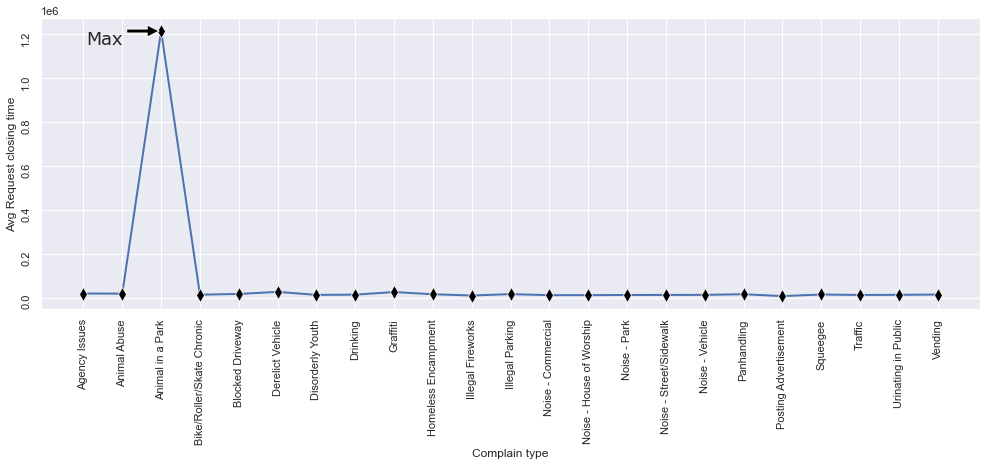

In [43]:
sns.set(font_scale=1)
plt.figure(figsize = (15,5))
sns.lineplot(data=dfGrpComplainTypeVsRequesttime,x="Complaint Type",y="Request_Closing_Time",marker = 'd', markersize = 10, markerfacecolor = 'Black',  lw = 2)
plt.tick_params(labelrotation=90) 
plt.xlabel("Complain type",fontsize=12)
plt.ylabel("Avg Request closing time",fontsize=12)
plt.annotate('Max', xy=("Animal in a Park", 1212605), xytext = (1,1212605), fontsize = 18, fontfamily = 'Verdana', arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')


### Conclusion 1
**Complain regarding Animal in a Park needs more time to close on average

In [44]:
dataANOVA=dfMasterTimedropNaNRemoved[["Complaint Type","Request_Closing_Time"]]
dataANOVA.rename(columns={"Complaint Type":"Complaint_Type"},inplace=True)
dataANOVA

,Complaint_Type,Request_Closing_Time
0,Noise - Street/Sidewalk,3315.00
1,Blocked Driveway,5176.00
2,Blocked Driveway,17491.00
3,Illegal Parking,27914.00
4,Illegal Parking,12422.00
...,...,...
300693,Noise - Commercial,28800.00
300694,Blocked Driveway,7231.00
300695,Noise - Commercial,11237.00
300696,Noise - Commercial,14733.00


In [45]:
dfMasterNanRemoved=dfMasterTimedropNaNRemoved
dfMasterNanRemoved.dropna(inplace=True)

In [46]:
dfMasterNanRemoved.head()

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
0,32310363,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.00,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,1005409.00,254678.00,MANHATTAN,40.87,-73.92,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,3315.00
1,32309934,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.00,27-07 23 AVENUE,23 AVENUE,27 STREET,...,1007766.00,221986.00,QUEENS,40.78,-73.92,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,5176.00
2,32309159,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.00,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,1015081.00,256380.00,BRONX,40.87,-73.89,"(40.870324522111424, -73.88852464418646)",2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00,17491.00
3,32305098,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.00,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,1031740.00,243899.00,BRONX,40.84,-73.83,"(40.83599404683083, -73.82837939584206)",2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00,27914.00
4,32306529,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.00,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,1019123.00,206375.00,QUEENS,40.73,-73.87,"(40.733059618956815, -73.87416975810375)",2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00,12422.00


Text(0, 0.5, 'Nos of Requests')

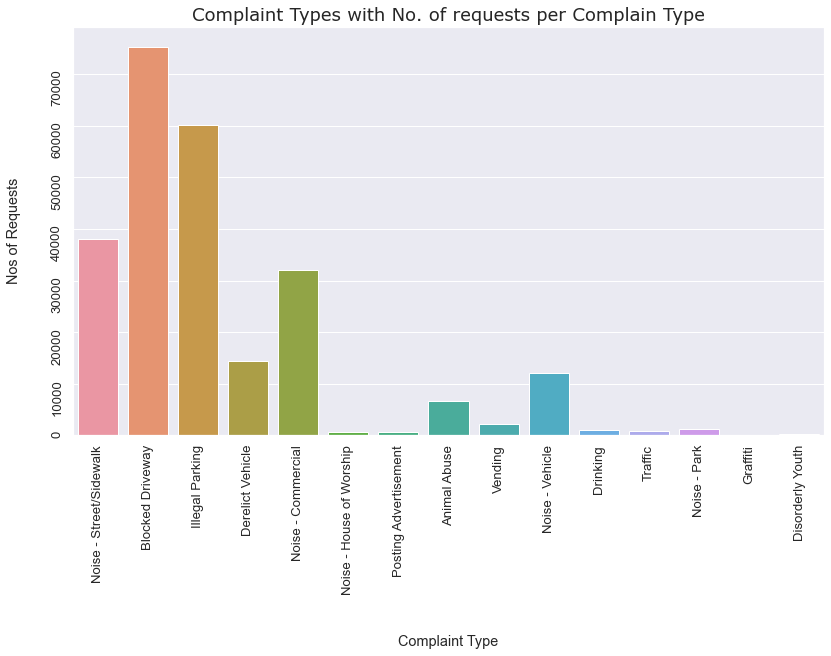

In [47]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12,7))
sns.countplot(x="Complaint Type",data=dfMasterNanRemoved)
plt.tick_params(labelrotation=90) 
plt.title("Complaint Types with No. of requests per Complain Type",fontsize = 18,fontfamily='Verdana')
plt.xlabel('Complaint Type',labelpad=40)
plt.ylabel('Nos of Requests',labelpad=30)


In [48]:
#From the above graph it can be obseved that the Blocked Driveway has got most nos of complains
MaxComplainType=dfMasterNanRemoved['Complaint Type'].value_counts().head(1)
print(f'The most of the complain is regarding \n{MaxComplainType}')

The most of the complain is regarding 
Blocked Driveway    75291
Name: Complaint Type, dtype: int64


### Conclusion 2
**From above analysis as well as from the graph it can be observed that the most complain is regarding Blocked Driveway.

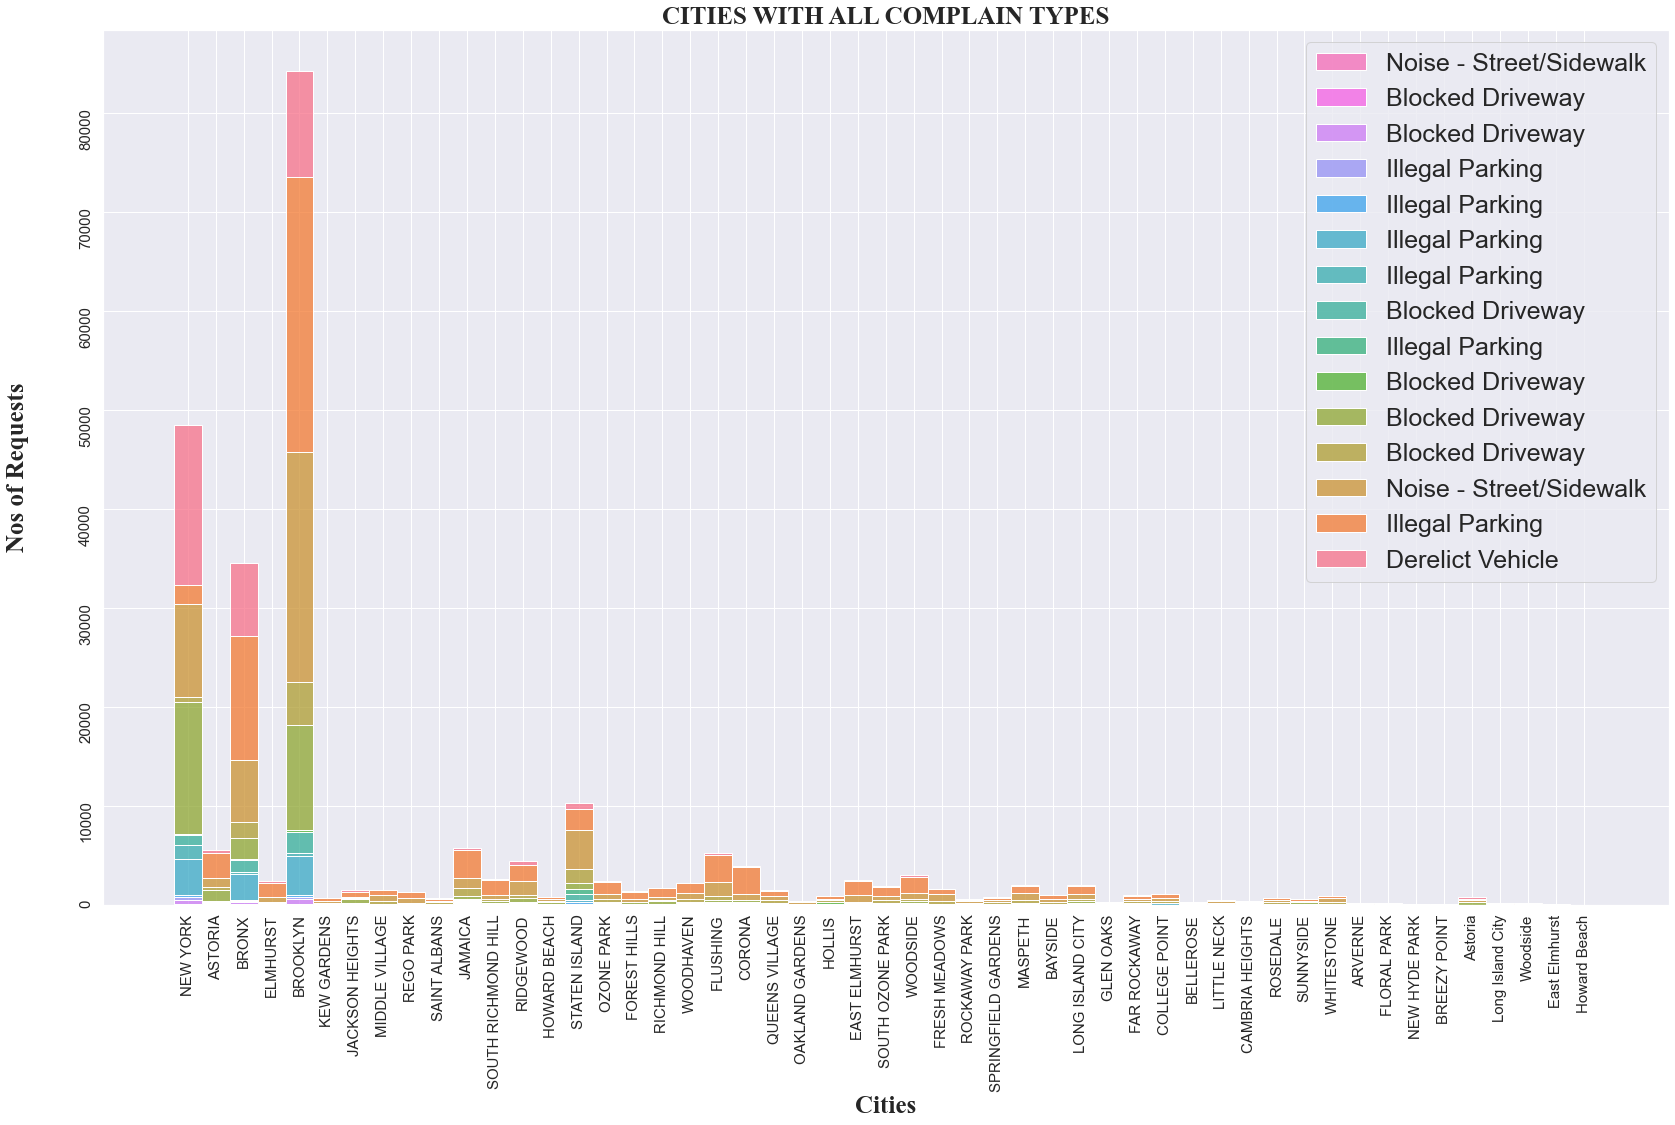

In [76]:
sns.set(font_scale=5)
plt.figure(figsize=(25,15))
sns.set_theme(palette="pastel")
sns.histplot(data=dfMasterNanRemoved,x="City", hue='Complaint Type',multiple="stack",edgecolor='white' )
plt.tick_params(labelrotation=90,labelsize = 15) 
plt.title("CITIES WITH ALL COMPLAIN TYPES",fontsize = 25,fontfamily='Times New Roman',weight='bold')
plt.xlabel('Cities',fontsize = 25,fontfamily='Times New Roman',weight='bold')
plt.ylabel('Nos of Requests',labelpad=50,fontsize = 25,fontfamily='Times New Roman',weight='bold')
plt.legend(dfMasterNanRemoved["Complaint Type"],fontsize = 25)


### Conclusion 3
**From the above Graph it can be observed that Bryooklyn has highest Nos of requests

Text(0, 0.5, 'AVERAGE REQUEST CLOSING TIME')

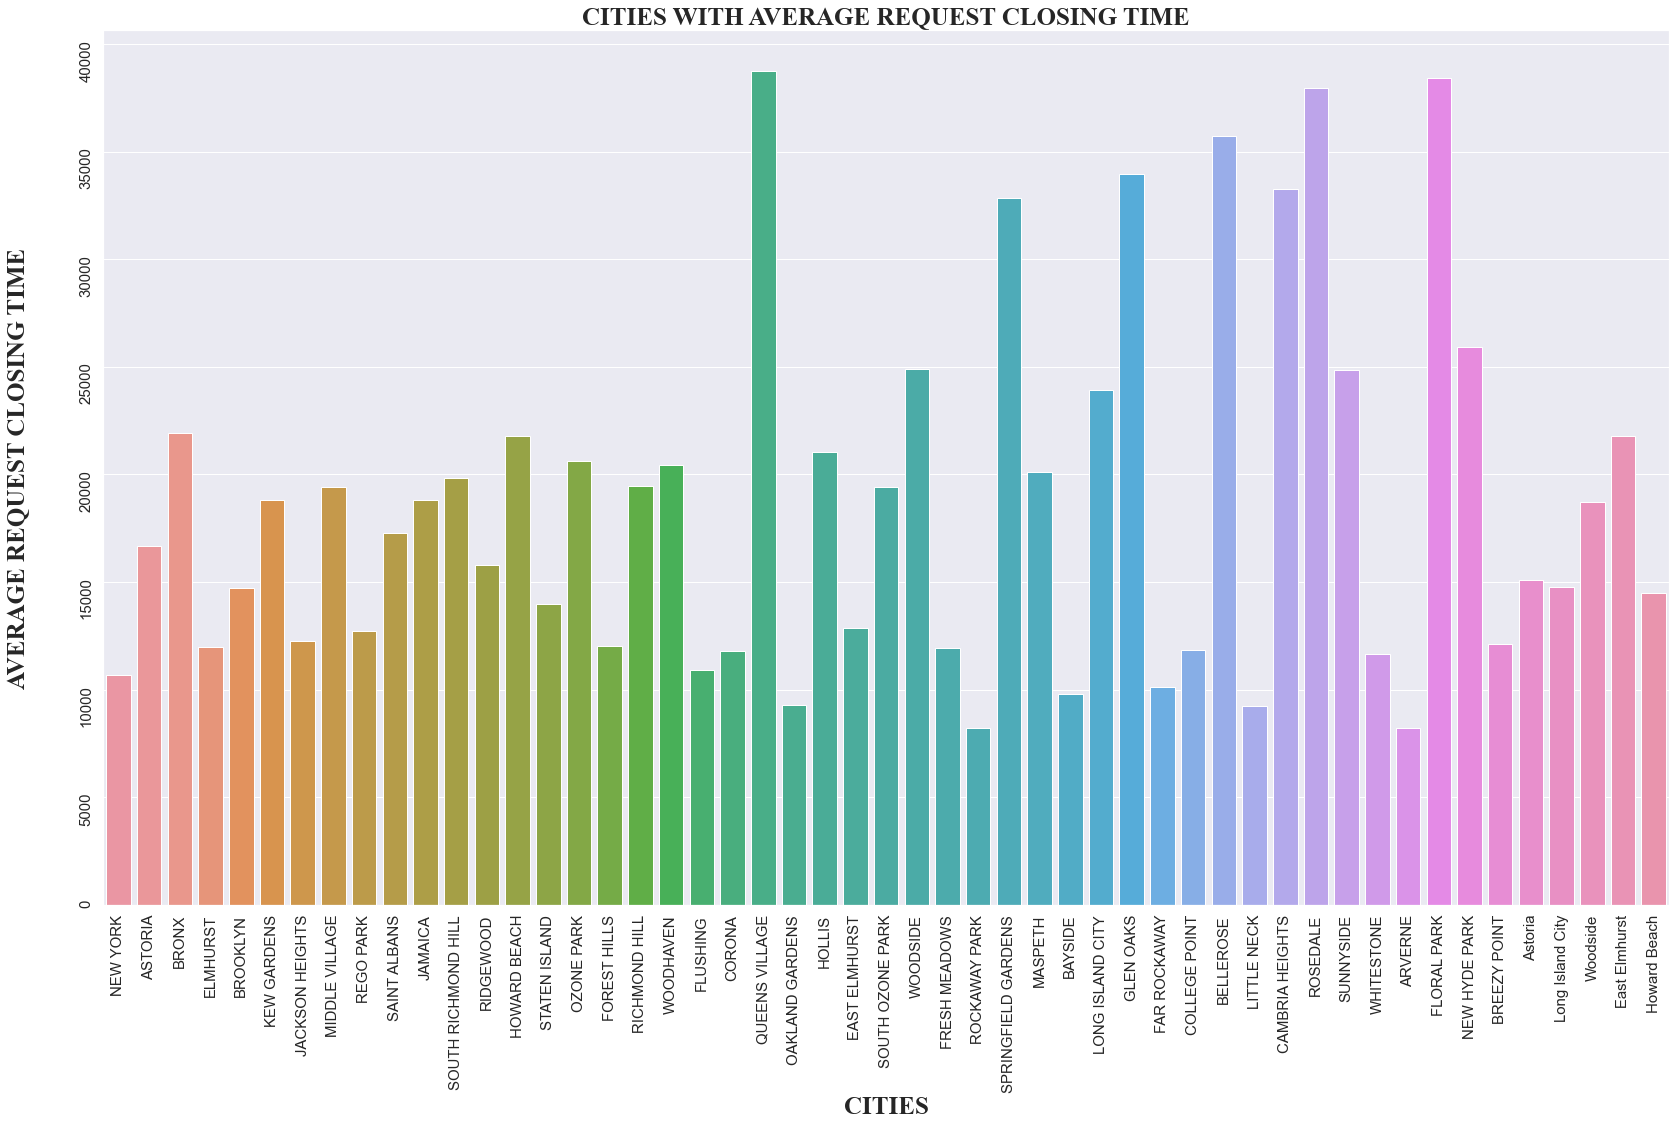

In [89]:
dfCitiesResolutionTime=dfMasterNanRemoved[["Request_Closing_Time","City",]].groupby(by=["City"]).mean().reset_index()
sns.set(font_scale=5)
plt.figure(figsize=(25,15))
sns.set_theme(palette="pastel")
sns.barplot(data=dfMasterNanRemoved,x="City", y="Request_Closing_Time",ci = 0 )
plt.tick_params(labelrotation=90,labelsize = 15) 
plt.title("CITIES WITH AVERAGE REQUEST CLOSING TIME",fontsize = 25,fontfamily='Times New Roman',weight='bold')
plt.xlabel('CITIES',fontsize = 25,fontfamily='Times New Roman',weight='bold')
plt.ylabel('AVERAGE REQUEST CLOSING TIME',labelpad=50,fontsize = 25,fontfamily='Times New Roman',weight='bold')
#plt.legend(dfCitiesResolutionTime["City"])

### Conclusion 4
**The complains reported from Qeens Village takes more time to close the complains on average

## Statistical Tests
Hypothesis Testing
Ques:Whether the average response time across complaint types is similar or not (overall)
Ho=The average reponse time across complaint type is similar
H1=The average reponse time across complaint type is not similar
We considered alpha as .05.

In [51]:
mod=ols("Request_Closing_Time~Complaint_Type", data=dataANOVA).fit()
aov_table=sm.stats.anova_lm(mod,type=2)
print(aov_table)

                      df             sum_sq         mean_sq      F  PR(>F)
Complaint_Type     22.00   5186216364008.22 235737107454.92 511.17    0.00
Residual       300673.00 138660737830903.34    461167906.10    NaN     NaN


Since in this case pvlaue is 0.00 which is less than alpha (.05), we reject the Ho and we accept the H1 with the conclusion that there is the average reponse time across complaint type is not similar.

In [53]:
dfComplaintypeLocation=dfMasterTimedropNaNRemoved[["Complaint Type","Location"]]
dfComplaintypeLocation.rename(columns={"Complaint Type":"Complaint_Type"},inplace=True)
dfComplaintypeLocation

,Complaint_Type,Location
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)"
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)"
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)"
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)"
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)"
...,...,...
300692,Noise - Commercial,"(40.71605290789855, -73.99137850370803)"
300694,Blocked Driveway,"(40.69407728322387, -73.8460866160573)"
300695,Noise - Commercial,"(40.69959035300927, -73.94423377144169)"
300696,Noise - Commercial,"(40.8377075854206, -73.83458731019586)"


In [55]:
dfComplaintypeLocationNaDroped=dfComplaintypeLocation
dfComplaintypeLocationNaDroped.dropna(inplace=True)


In [58]:
dfComplaintypeLocationNaDroped

,Complaint_Type,Location
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)"
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)"
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)"
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)"
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)"
...,...,...
300692,Noise - Commercial,"(40.71605290789855, -73.99137850370803)"
300694,Blocked Driveway,"(40.69407728322387, -73.8460866160573)"
300695,Noise - Commercial,"(40.69959035300927, -73.94423377144169)"
300696,Noise - Commercial,"(40.8377075854206, -73.83458731019586)"


# Are the type of complaint or service requested and location related?
Ho=There is no relation between Complaint type and Location
H1=There is relation between Complaint type and Location
alpha considered is .05


In [59]:
dfCrossTabComplainLocation=pd.crosstab(dfComplaintypeLocationNaDroped.Complaint_Type,dfComplaintypeLocationNaDroped.Location)
score,pvalue,df,et=stats.chi2_contingency(dfCrossTabComplainLocation)
print("score : {:.2f} , pvalue : {:.2f}".format(score,pvalue))

score : 2748143.70 , pvalue : 0.00


Here pvalue is less than alpha. Hence we reject the null hypothesis and accept H1 that There is relation between Complaint type and Location

In [60]:
dfGrpComplainTypeVsRequesttime['Request_Closing_Time'].dtype

dtype('float64')

In [61]:
pd.set_option("display.max_columns", None)
dfMasterTimedropNaNRemoved.head(2)

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,created_date,closed_date,due_date,Request_Closing_Time
0,32310363,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.00,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.00,254678.00,MANHATTAN,40.87,-73.92,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,3315.00
1,32309934,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.00,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,Closed,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.00,221986.00,QUEENS,40.78,-73.92,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,5176.00


In [62]:
dfMasterTimedropNaNRemoved.isnull().sum()

Unique Key                        0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Borough                      0
Latitude                          0
Longitude                         0
Location                          0
created_date                      0
closed_date                       0
due_date                    

In [63]:
#pd.crosstab(dfMasterTimedropNaNRemoved['Incident Zip'],dfMasterTimedropNaNRemoved['Incident Address'])

In [64]:
dfMasterTimedropNaNRemoved["Request_Closing_Time"].isnull().count()

245664

In [65]:
len(dfMasterTimedrop["Request_Closing_Time"])

245664

In [66]:
dfMasterTimedrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245664 entries, 0 to 300697
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      245664 non-null  int64         
 1   Agency                          245664 non-null  object        
 2   Agency Name                     245664 non-null  object        
 3   Complaint Type                  245664 non-null  object        
 4   Descriptor                      245664 non-null  object        
 5   Location Type                   245664 non-null  object        
 6   Incident Zip                    245664 non-null  float64       
 7   Incident Address                245664 non-null  object        
 8   Street Name                     245664 non-null  object        
 9   Cross Street 1                  245664 non-null  object        
 10  Cross Street 2                  245664 non-null  object 

In [67]:
dfGrpComplainTypeVsRequesttime=dfMasterTimedropNaNRemoved[["Request_Closing_Time","Complaint Type",]].groupby(by=["Complaint Type"]).mean()
dfGrpComplainTypeVsRequesttime

,Request_Closing_Time
Complaint Type,
Animal Abuse,19301.11
Blocked Driveway,17063.28
Derelict Vehicle,26033.09
Disorderly Youth,13035.34
Drinking,13835.25
Graffiti,21129.00
Illegal Parking,16128.59
Noise - Commercial,11259.17
Noise - House of Worship,11893.22
